# Unemployment Analysis using Python

#### 1. Importing necessary modules 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### 2. Importing datasets 

In [12]:
UA = pd.read_csv("Unemployment in India.csv")
UA = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
UA.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


#### 3. Analyzing dataset

In [13]:
#Describing dataset
UA.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [14]:
# checking null values
UA.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [15]:
# renaming columns
UA.columns = ['State','Date','Frequency','Unemployment Rate','Employed','Labour Participation Rate','Region','Longitude','Latitude']

#### 4. Data Visualization-Graphs 

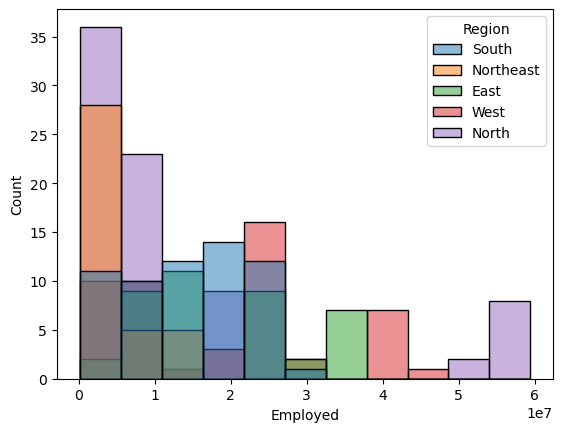

In [16]:
#histplot for employment data
sns.histplot(x='Employed',hue='Region',data=UA)
plt.show()

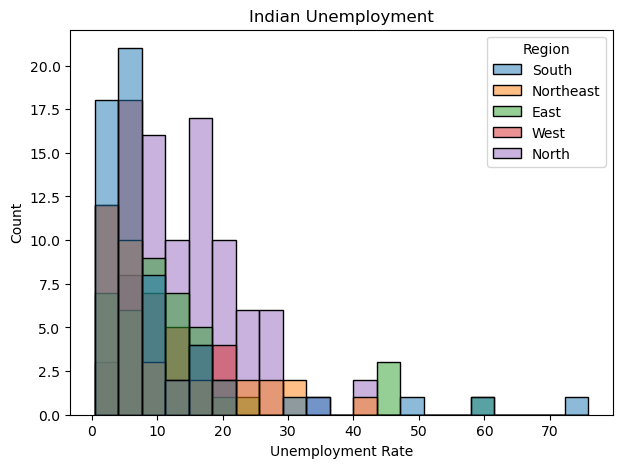

In [17]:
# histplot for unemployed data
plt.figure(figsize=(7,5))
plt.title('Indian Unemployment')
sns.histplot(x='Unemployment Rate',hue='Region',data=UA)
plt.show()

In [18]:
# sunburst chart for vizualization
up = UA[['State','Region','Unemployment Rate']]
figure= px.sunburst(up, path=['Region','State'], values='Unemployment Rate',width=700,height=700,color_continuous_scale='RdY1Gn',title='Unemployment Rate in India')
figure.show()

#### 5. Corelation

In [19]:
# checking the correlation of variables
UA.corr()

,Unemployment Rate,Employed,Labour Participation Rate,Longitude,Latitude
Unemployment Rate,1.000000,-0.245176,-0.073540,0.149976,-0.023976
Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
Labour Participation Rate,-0.073540,-0.047948,1.000000,0.080372,0.397836
Longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
Latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


<AxesSubplot:>

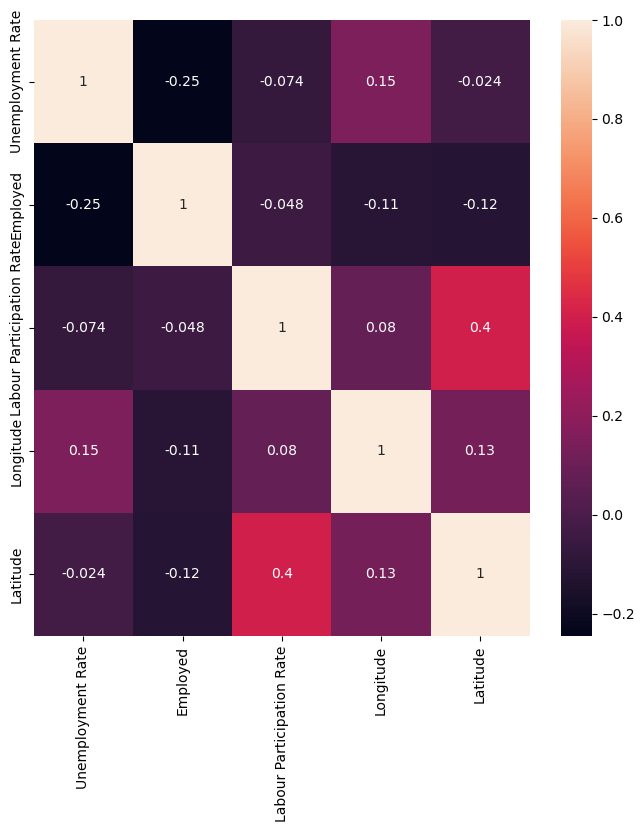

In [20]:
#plotting correlation matrix
cor= UA.corr()
fig, ax=plt.subplots(figsize=(8,8))
sns.heatmap(cor,annot=True,ax=ax)